# First ML project 

* We will be working on a heart disease dataset and our work is to predict whether people having heart disease or not, using the features given in the
  dataset.

### Steps to be done 

## 1. Define the problem:

* We need to perdict whether a patient has heart disease or not. This problem comes under classification problem. 

## 2. Data collection:

* The data is download from kaggle since it is a sample project. Future projects may contain real world datasets.
* The link for the dataset is https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset
    
## 3. Load the dataset and Preprocess

### 3.1 Load the data
* Understand the data before doing anything(this is the most important part of the project).
* Then load the data where `X` be the feature variable and `y` be the target variable.
### 3.2 Preprocessing the data
* Check for any missing values.
* If necessary convert the categorical values in numerical values.

## 4. Split the data into Train and Test

## 5. Chose the right model and fit the model
* chose the model acc to the dataset and probelm
* fit the model using the training data

## 6. Tune the model with hyperparameters 

## 7. Evaluate the model 

## 8. Deploy the model after testing 

In [60]:
## Lets get started...................

## import all the package and libraries needed

## Data packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## dealing with ML 
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

## Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report


# 2. Data collection and analysis  

In [2]:
## Data analysis
data_unmodified = pd.read_csv("heart-disease .csv")
data_unmodified.head()

Unnamed: 0  age     sex  cp  trestbps   chol  fbs  restecg  thalach  exang  \
0           0   63    male   3     145.0  233.0    1        0    150.0      0   
1           1   37    male   2     130.0  250.0    0        1    187.0      0   
2           2   41  female   1     130.0  204.0    0        0    172.0      0   
3           3   56    male   1     120.0  236.0    0        1    178.0      0   
4           4   57  female   0       NaN  354.0    0        1    163.0      1   

   oldpeak  slope  ca  thal target  
0      2.3      0   0     1    yes  
1      3.5      0   0     2    yes  
2      1.4      2   0     2    yes  
3      0.8      2   0     2    yes  
4      0.6      2   0     2    yes

In [3]:
data_1=data_unmodified.drop(columns="Unnamed: 0", axis = 1)
data_1.head()

age     sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    male   3     145.0  233.0    1        0    150.0      0      2.3   
1   37    male   2     130.0  250.0    0        1    187.0      0      3.5   
2   41  female   1     130.0  204.0    0        0    172.0      0      1.4   
3   56    male   1     120.0  236.0    0        1    178.0      0      0.8   
4   57  female   0       NaN  354.0    0        1    163.0      1      0.6   

   slope  ca  thal target  
0      0   0     1    yes  
1      0   0     2    yes  
2      2   0     2    yes  
3      2   0     2    yes  
4      2   0     2    yes

In [4]:
data_1.shape

(303, 14)

In [5]:
data_1.dtypes

age           int64
sex          object
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target       object
dtype: object

In [6]:
## Lets find the different classes 1 = yes and 0 = no
data_1["target"].value_counts()

target
yes    165
no     138
Name: count, dtype: int64

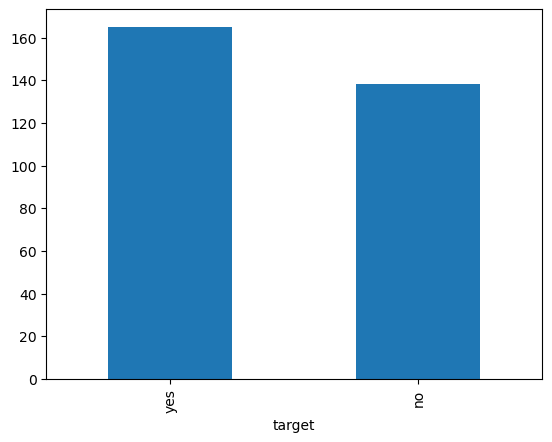

In [7]:
data_1["target"].value_counts().plot(kind = "bar");

In [8]:
data_1.isna().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Lets handle the missing values 

numerical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])
numerical_features = ["trestbps", "chol", "thalach"]
data_1['sex'] = data_1['sex'].map({'male': 1, 'female': 0})
data_1['target'] = data_1['target'].map({'yes': 1, 'no': 0})
preprocessor = ColumnTransformer([("numerical", numerical_transformer, numerical_features)], remainder="passthrough")
data_array = preprocessor.fit_transform(data_1)
all_columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

transformed_columns = (numerical_features + 
                       [col for col in all_columns if col not in numerical_features])
data = pd.DataFrame(data_array, columns=transformed_columns)
data = data[all_columns]
data.head()

age  sex   cp    trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  3.0  145.000000  233.0  1.0      0.0    150.0    0.0      2.3   
1  37.0  1.0  2.0  130.000000  250.0  0.0      1.0    187.0    0.0      3.5   
2  41.0  0.0  1.0  130.000000  204.0  0.0      0.0    172.0    0.0      1.4   
3  56.0  1.0  1.0  120.000000  236.0  0.0      1.0    178.0    0.0      0.8   
4  57.0  0.0  0.0  131.712375  354.0  0.0      1.0    163.0    1.0      0.6   

   slope   ca  thal  target  
0    0.0  0.0   1.0     1.0  
1    0.0  0.0   2.0     1.0  
2    2.0  0.0   2.0     1.0  
3    2.0  0.0   2.0     1.0  
4    2.0  0.0   2.0     1.0

In [10]:
data_1.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

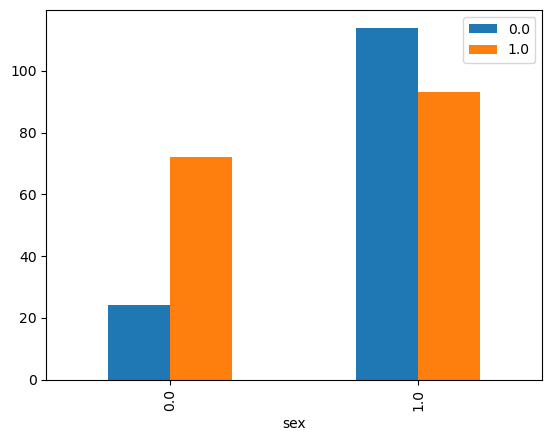

In [12]:
## EDA 
pd.crosstab(data.sex, data.target).plot(kind = "bar");
plt.legend();

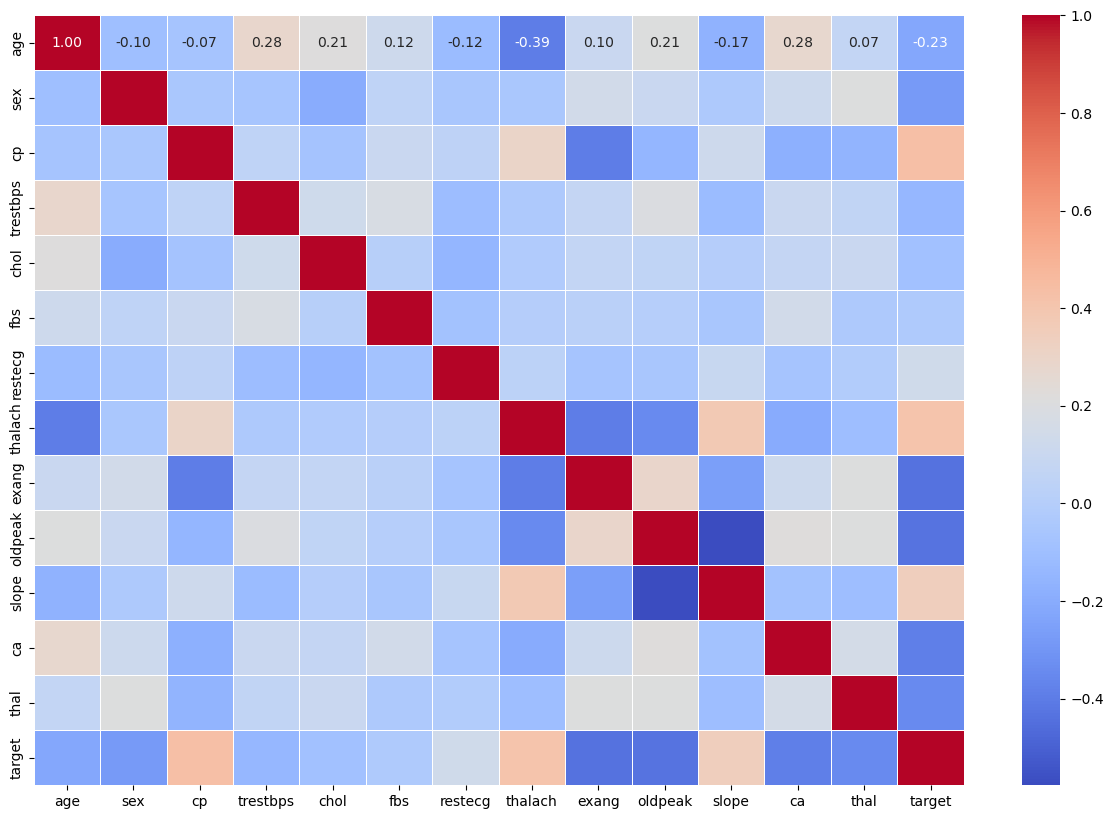

In [13]:
# Correlation matrix
corr_mat = data.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_mat, annot= True, linewidths=0.5,cmap='coolwarm', fmt=".2f")

# 3. Modelling ( loading the data )

In [14]:
# split the data into feature and target variable
X = data.drop("target", axis = 1)
y = data["target"]

# 4. Spliting the data into Train and test data

In [15]:
# split the data into training and testing data
np.random.seed(12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

Now we have split the data into training and test data.........   lets now list out the models we need to use here.

Models to check out:
1. Logistic regression
2. RandomForestClassifier
3. K-Nearest Neighbours Classifiers

* First, we will create dictionary of models...
* Then create a function for fitting and scoring each model

## Lets create baseline models

In [16]:
# Model dictionary
models = {"Logistic Regression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier(), 
          "K-Nearest Neighbour": KNeighborsClassifier()}
# Create a function to fit and score the model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # setup random seed
    np.random.seed(12)
    # create a empty model_score dictionary
    model_score = {}
   
    for name, model in models.items(): # model.items referes to the key, values inside the dictionary
        # fit the model
        model.fit(X_train, y_train)
        # append the score to the empty dictionary
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [17]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train,y_test=y_test)
model_scores

D:\ML_Projects\Heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7704918032786885,
 'RandomForestClassifier': 0.8360655737704918,
 'K-Nearest Neighbour': 0.6557377049180327}

### Baseline Model comparison 

<Axes: >

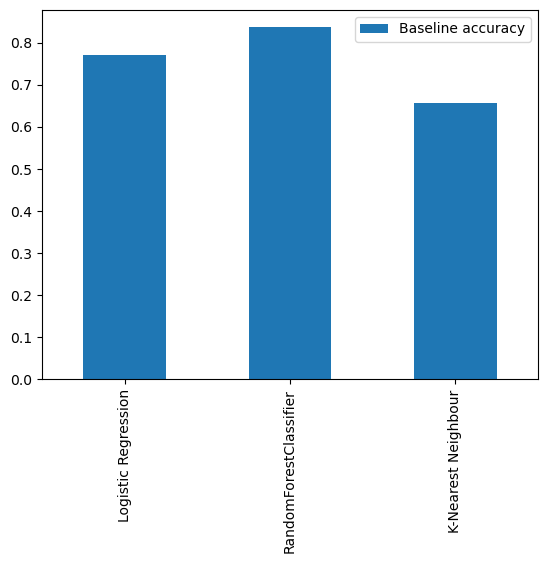

In [18]:
model_comparison = pd.DataFrame(model_scores ,index = ["Baseline accuracy"])
model_comparison.T.plot(kind = "bar")

# 6. Hyperparameter tuning 

Now lets see what should be done in order to get good results.

3 methods: 
1. By hand
2. RandomizedSearchCV
3. GridSearchCV

.....Lets skip `Kneighbors` by hand


In [19]:
# create PipeLine for each ML algorithm 
pipeline_rf = Pipeline(steps=[("preprocessor", preprocessor), ("rf_classifier", RandomForestClassifier())])
pipeline_log = Pipeline(steps=[("preprocessor", preprocessor), ("log_regression", LogisticRegression())])
pipeline_knn = Pipeline(steps=[("preprocessor", preprocessor), ("knn_classifier", KNeighborsClassifier())])

# combine the classifiers in a dictionary
pipelines = {"RandomForestClassifier":pipeline_rf,
             "Logistic Regression":pipeline_log,
             "K-Nearest Neighbour":pipeline_knn}

# parameter gird 
param_grid = {
    'K-Nearest Neighbour': {
        'knn_classifier__n_neighbors': [3, 5, 7, 9, 11],
        'knn_classifier__leaf_size': (20,40,1),
        'knn_classifier__p': (1,2),
        'knn_classifier__weights': ('uniform', 'distance'),
        'knn_classifier__metric': ('minkowski', 'chebyshev')
    },
    'RandomForestClassifier':{
        'rf_classifier__n_estimators': np.arange(10,100,10),
        'rf_classifier__max_features': ['auto', 'sqrt'],
        'rf_classifier__max_depth': [None, 10, 20, 30],
        'rf_classifier__min_samples_split': [2, 5, 10],
        'rf_classifier__min_samples_leaf': [1, 2, 4],
        'rf_classifier__bootstrap': [True, False]
    },
    'Logistic Regression':{
        'log_regression__C': [0.01, 0.1, 1, 10, 100],
        'log_regression__solver': ['liblinear', 'saga']
    },
}

# Lets defin RandomSearchCV function
def RandomSearchCV(pipelines, param_grid, X_train, X_test, y_train, y_test):
    model_result = {}
    for model_name, pipeline in pipelines.items():
        random_search = RandomizedSearchCV(pipeline, param_grid[model_name], cv= 5, n_iter=10,verbose= 2)
        random_search.fit(X_train, y_train)
        model_result[model_name] = random_search
    return model_result

# Lets define GridSearchCV function
def Grid_searchCV(pipelines, param_grid, X_train, X_test, y_train, y_test):
    model_result = {}
    for model_name, pipeline in pipelines.items():
        grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        model_result[model_name] = grid_search
    return model_result

In [20]:
# lets call the function to view the best params and accuracy of it
np.random.seed(12)
RsCV = RandomSearchCV(pipelines=pipelines, 
                      param_grid= param_grid,
                      X_train=X_train,
                      X_test=X_test,
                      y_train=y_train, 
                      y_test=y_test)
print(RsCV)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END rf_classifier__bootstrap=False, rf_classifier__max_depth=30, rf_classifier__max_features=sqrt, rf_classifier__min_samples_leaf=4, rf_classifier__min_samples_split=2, rf_classifier__n_estimators=90; total time=   0.0s
[CV] END rf_classifier__bootstrap=False, rf_classifier__max_depth=30, rf_classifier__max_features=sqrt, rf_classifier__min_samples_leaf=4, rf_classifier__min_samples_split=2, rf_classifier__n_estimators=90; total time=   0.0s
[CV] END rf_classifier__bootstrap=False, rf_classifier__max_depth=30, rf_classifier__max_features=sqrt, rf_classifier__min_samples_leaf=4, rf_classifier__min_samples_split=2, rf_classifier__n_estimators=90; total time=   0.0s
[CV] END rf_classifier__bootstrap=False, rf_classifier__max_depth=30, rf_classifier__max_features=sqrt, rf_classifier__min_samples_leaf=4, rf_classifier__min_samples_split=2, rf_classifier__n_estimators=90; total time=   0.0s
[CV] END rf_classifier__bootstrap=F

D:\ML_Projects\Heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\ML_Projects\Heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ML_Projects\Heart-disease-project\env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\ML_Projects\Heart-disease-project\env\Lib\site-packages\sklear

[CV] END log_regression__C=0.01, log_regression__solver=saga; total time=   0.0s
[CV] END log_regression__C=0.01, log_regression__solver=saga; total time=   0.0s
[CV] END log_regression__C=0.01, log_regression__solver=saga; total time=   0.0s
[CV] END log_regression__C=0.1, log_regression__solver=liblinear; total time=   0.0s
[CV] END log_regression__C=0.1, log_regression__solver=liblinear; total time=   0.0s
[CV] END log_regression__C=0.1, log_regression__solver=liblinear; total time=   0.0s
[CV] END log_regression__C=0.1, log_regression__solver=liblinear; total time=   0.0s
[CV] END log_regression__C=0.1, log_regression__solver=liblinear; total time=   0.0s
[CV] END .log_regression__C=0.1, log_regression__solver=saga; total time=   0.0s
[CV] END .log_regression__C=0.1, log_regression__solver=saga; total time=   0.0s
[CV] END .log_regression__C=0.1, log_regression__solver=saga; total time=   0.0s
[CV] END .log_regression__C=0.1, log_regression__solver=saga; total time=   0.0s
[CV] END

D:\ML_Projects\Heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\ML_Projects\Heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\ML_Projects\Heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\ML_Projects\Heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\ML_Projects\Heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\ML_Projects\Heart-disease-p

[CV] END knn_classifier__leaf_size=20, knn_classifier__metric=minkowski, knn_classifier__n_neighbors=3, knn_classifier__p=1, knn_classifier__weights=distance; total time=   0.0s
[CV] END knn_classifier__leaf_size=20, knn_classifier__metric=minkowski, knn_classifier__n_neighbors=3, knn_classifier__p=1, knn_classifier__weights=distance; total time=   0.0s
[CV] END knn_classifier__leaf_size=20, knn_classifier__metric=minkowski, knn_classifier__n_neighbors=3, knn_classifier__p=1, knn_classifier__weights=distance; total time=   0.0s
[CV] END knn_classifier__leaf_size=20, knn_classifier__metric=chebyshev, knn_classifier__n_neighbors=5, knn_classifier__p=1, knn_classifier__weights=uniform; total time=   0.0s
[CV] END knn_classifier__leaf_size=20, knn_classifier__metric=chebyshev, knn_classifier__n_neighbors=5, knn_classifier__p=1, knn_classifier__weights=uniform; total time=   0.0s
[CV] END knn_classifier__leaf_size=20, knn_classifier__metric=chebyshev, knn_classifier__n_neighbors=5, knn_clas

In [21]:
print("RandomizedSearchCV Results:")
rand_score = {}
for model_name, random_search in RsCV.items():
    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {random_search.best_score_}")
    rand_score[model_name] = random_search.best_score_
rand_model_dataframe = pd.DataFrame(rand_score, index = ["RandomizedSearchCV accuracy"])
rand_model_dataframe

RandomizedSearchCV Results:
Best parameters for RandomForestClassifier: {'rf_classifier__n_estimators': 90, 'rf_classifier__min_samples_split': 2, 'rf_classifier__min_samples_leaf': 2, 'rf_classifier__max_features': 'sqrt', 'rf_classifier__max_depth': 10, 'rf_classifier__bootstrap': True}
Best cross-validation score for RandomForestClassifier: 0.8264455782312925
Best parameters for Logistic Regression: {'log_regression__solver': 'liblinear', 'log_regression__C': 1}
Best cross-validation score for Logistic Regression: 0.8511054421768709
Best parameters for K-Nearest Neighbour: {'knn_classifier__weights': 'uniform', 'knn_classifier__p': 1, 'knn_classifier__n_neighbors': 7, 'knn_classifier__metric': 'minkowski', 'knn_classifier__leaf_size': 20}
Best cross-validation score for K-Nearest Neighbour: 0.6612244897959184


RandomForestClassifier  Logistic Regression  \
RandomizedSearchCV accuracy                0.826446             0.851105   

                             K-Nearest Neighbour  
RandomizedSearchCV accuracy             0.661224

In [22]:
model_scores

{'Logistic Regression': 0.7704918032786885,
 'RandomForestClassifier': 0.8360655737704918,
 'K-Nearest Neighbour': 0.6557377049180327}

In [23]:
np.random.seed(12)
GsCV = Grid_searchCV(pipelines, param_grid, X_train,X_test, y_train, y_test)
print(GsCV)

D:\ML_Projects\Heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1925 fits failed with the following error:
Traceback (most recent call last):
  File "D:\ML_Projects\Heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ML_Projects\Heart-disease-project\env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\ML_Projects\Heart-disease-project\env\Lib\site-package

{'RandomForestClassifier': GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['trestbps',
                                                                          'chol',
                                                                          'thalach'])])),
                                       ('rf_classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf_classifier__bootstrap': [True, False],
                         'rf_classifier__m

In [47]:
print("GridSearchCV results :")
grid_model_scores = {}
grid_model_preds = {}
grid_model_best_param = {}
for model_name, grid_search in GsCV.items():
    print(f"Best parameter for model {model_name}: {grid_search.best_params_}")
    print(f"Best accuracy for model {model_name}: {grid_search.best_score_}")
    grid_model_scores[model_name] = grid_search.best_score_
    grid_model_best_param[model_name] = grid_search.best_params_
    grid_model_preds[model_name] = grid_search.predict(X_test)
print(grid_model_scores)
grid_model_dataframe = pd.DataFrame(grid_model_scores, index = ["GridSearchCV accuracy"])
grid_model_dataframe

GridSearchCV results :
Best parameter for model RandomForestClassifier: {'rf_classifier__bootstrap': True, 'rf_classifier__max_depth': None, 'rf_classifier__max_features': 'sqrt', 'rf_classifier__min_samples_leaf': 4, 'rf_classifier__min_samples_split': 10, 'rf_classifier__n_estimators': 30}
Best accuracy for model RandomForestClassifier: 0.8594387755102041
Best parameter for model Logistic Regression: {'log_regression__C': 1, 'log_regression__solver': 'liblinear'}
Best accuracy for model Logistic Regression: 0.8511054421768709
Best parameter for model K-Nearest Neighbour: {'knn_classifier__leaf_size': 20, 'knn_classifier__metric': 'minkowski', 'knn_classifier__n_neighbors': 9, 'knn_classifier__p': 1, 'knn_classifier__weights': 'uniform'}
Best accuracy for model K-Nearest Neighbour: 0.6980442176870748
{'RandomForestClassifier': 0.8594387755102041, 'Logistic Regression': 0.8511054421768709, 'K-Nearest Neighbour': 0.6980442176870748}


RandomForestClassifier  Logistic Regression  \
GridSearchCV accuracy                0.859439             0.851105   

                       K-Nearest Neighbour  
GridSearchCV accuracy             0.698044

In [25]:
rand_model_dataframe

RandomForestClassifier  Logistic Regression  \
RandomizedSearchCV accuracy                0.826446             0.851105   

                             K-Nearest Neighbour  
RandomizedSearchCV accuracy             0.661224

In [26]:
model_comparison

Logistic Regression  RandomForestClassifier  \
Baseline accuracy             0.770492                0.836066   

                   K-Nearest Neighbour  
Baseline accuracy             0.655738

In [27]:
combined_dataframe = pd.concat([model_comparison, rand_model_dataframe, grid_model_dataframe])
combined_dataframe

Logistic Regression  RandomForestClassifier  \
Baseline accuracy                       0.770492                0.836066   
RandomizedSearchCV accuracy             0.851105                0.826446   
GridSearchCV accuracy                   0.851105                0.859439   

                             K-Nearest Neighbour  
Baseline accuracy                       0.655738  
RandomizedSearchCV accuracy             0.661224  
GridSearchCV accuracy                   0.698044

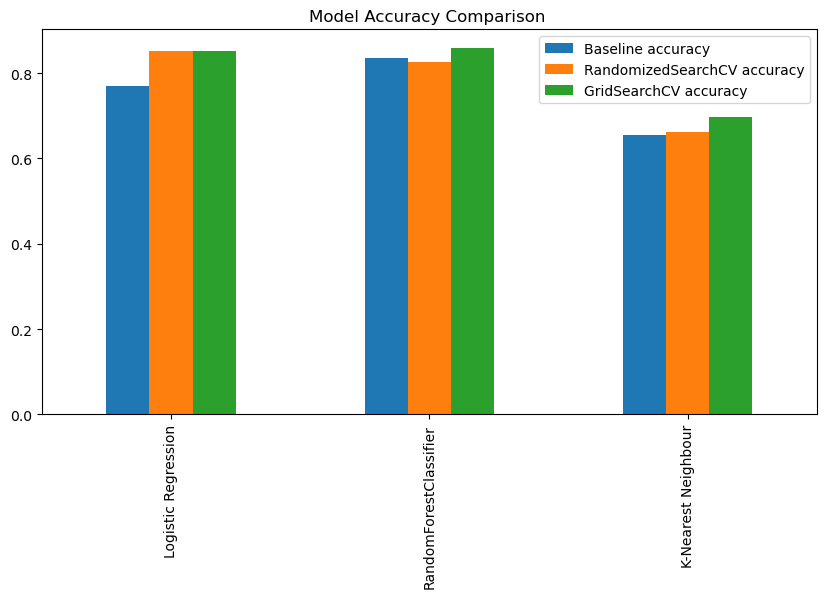

In [28]:
combined_dataframe.T.plot(kind="bar", figsize = (10, 5), title ='Model Accuracy Comparison ', legend ='Evaluation Method');
##fig, ax = plt.subplots(figsize = (10, 5))
#sns.barplot(data= combined_dataframe)
#plt.title('Model Scores Across Different Datasets')
#plt.show()

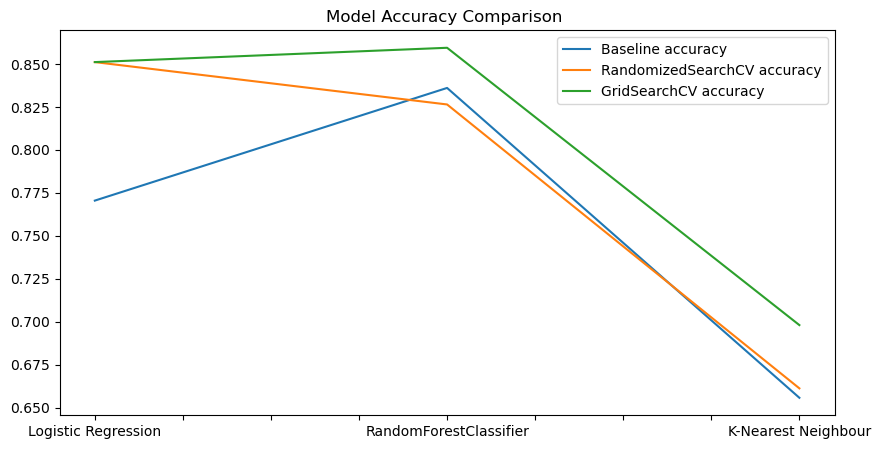

In [29]:
combined_dataframe.T.plot(kind="line", figsize = (10, 5), title ='Model Accuracy Comparison ', legend ='Evaluation Method');

## Evaluating the tuned machine learning classifier, beyond acccuracy

* ROC curve
* Confusion Matrix
* Classification report
* Precision
* Recall
* F1-score

**Precision**

In [33]:
grid_model_preds

{'RandomForestClassifier': array([1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
        0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
        1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
        1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]),
 'Logistic Regression': array([1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
        0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
        1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 1., 0., 0., 0.]),
 'K-Nearest Neighbour': array([1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
        0., 1., 0., 1., 0., 1., 1., 0., 0., 0.])}

In [66]:
np.random.seed(12)
Precision = {}
for name, preds in grid_model_preds.items():
    Precision[name] = precision_score(y_true=y_test, y_pred=preds)
for name, preds in Precision.items():
    print(f"The Precision_scores for {name} : {preds}")
log_reg_preds = grid_model_preds["Logistic Regression"]
rand_cls_preds = grid_model_preds["RandomForestClassifier"]

The Precision_scores for RandomForestClassifier : 0.7741935483870968
The Precision_scores for Logistic Regression : 0.7222222222222222
The Precision_scores for K-Nearest Neighbour : 0.5952380952380952


**ROC Curve**

In [48]:
grid_model_best_param

{'RandomForestClassifier': {'rf_classifier__bootstrap': True,
  'rf_classifier__max_depth': None,
  'rf_classifier__max_features': 'sqrt',
  'rf_classifier__min_samples_leaf': 4,
  'rf_classifier__min_samples_split': 10,
  'rf_classifier__n_estimators': 30},
 'Logistic Regression': {'log_regression__C': 1,
  'log_regression__solver': 'liblinear'},
 'K-Nearest Neighbour': {'knn_classifier__leaf_size': 20,
  'knn_classifier__metric': 'minkowski',
  'knn_classifier__n_neighbors': 9,
  'knn_classifier__p': 1,
  'knn_classifier__weights': 'uniform'}}

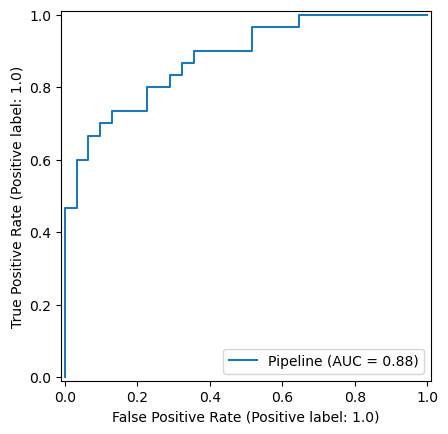

In [56]:
best_log_reg = GsCV["Logistic Regression"].best_estimator_
best_rand_cls = c
RocCurveDisplay.from_estimator(best_log_reg, X_test, y_test);

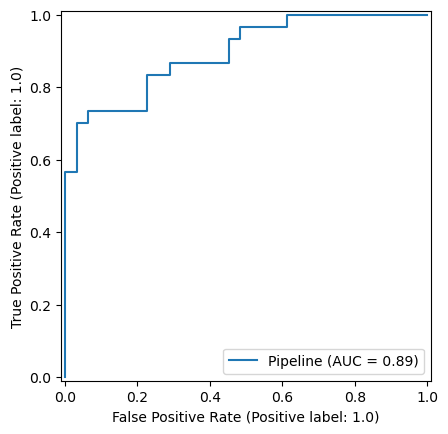

In [59]:
RocCurveDisplay.from_estimator(best_rand_cls, X_test, y_test);

**Confusion Matrix**

In [63]:
confusion_matrix(y_test, log_reg_preds)

array([[21, 10],
       [ 4, 26]], dtype=int64)

In [65]:
print(classification_report(y_test, log_reg_preds))

              precision    recall  f1-score   support

         0.0       0.84      0.68      0.75        31
         1.0       0.72      0.87      0.79        30

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [68]:
print(classification_report(y_test, rand_cls_preds))

              precision    recall  f1-score   support

         0.0       0.80      0.77      0.79        31
         1.0       0.77      0.80      0.79        30

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [73]:
print(best_log_reg )

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['trestbps', 'chol',
                                                   'thalach'])])),
                ('log_regression',
                 LogisticRegression(C=1, solver='liblinear'))])


In [74]:
# create new classifier with best parameters 
clf_rand = RandomForestClassifier(min_samples_leaf=4, min_samples_split=10, n_estimators=30)
log_reg = LogisticRegression(C=1, solver='liblinear')

In [115]:
## cross validate ACCURACY
np.random.seed(12)
cv_acc = cross_val_score(clf_rand, X, y, cv=5, scoring="accuracy")# for randomforest
cv_acc_2 = cross_val_score(log_reg, X, y, cv=5, scoring="accuracy")# for logistic regression
cv_acc,cv_acc_2
cv_acc = np.mean(cv_acc)
cv_acc_2 = np.mean(cv_acc_2)
cv_acc, cv_acc_2

(0.8218032786885245, 0.8182513661202186)

In [116]:
# cross validate Precision
np.random.seed(12)
cv_precision = cross_val_score(clf_rand, X, y, cv=5, scoring="precision")# for randomforest
cv_precision_2 = cross_val_score(log_reg, X, y, cv=5, scoring="precision")# for logistic regression
cv_precision = np.mean(cv_precision)
cv_precision_2 = np.mean(cv_precision_2)
cv_precision, cv_precision_2

(0.8206006493506492, 0.8122549019607843)

In [117]:
# cross validate Recall
np.random.seed(12)
cv_recall = cross_val_score(clf_rand, X, y, cv=5, scoring="recall")# for randomforest
cv_recall_2 = cross_val_score(log_reg, X, y, cv=5, scoring="recall")# for logistic regression
cv_recall = np.mean(cv_recall)
cv_recall_2 = np.mean(cv_recall_2)
cv_recall, cv_recall_2

(0.8666666666666666, 0.8727272727272727)

In [114]:
# cross validate f1
np.random.seed(12)
cv_f1 = cross_val_score(clf_rand, X, y, cv=5, scoring="f1")# for randomforest
cv_f1_2 = cross_val_score(log_reg, X, y, cv=5, scoring="f1")# for logistic regression
cv_f1 = np.mean(cv_f1)
cv_f1_2 = np.mean(cv_f1_2)
cv_f1, cv_recall_2

(0.8417755813887965, 0.8727272727272727)

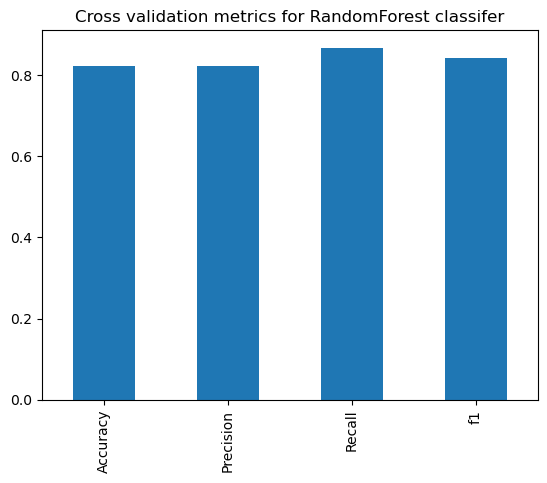

In [137]:
# Visualize as graph
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                           "Precision" :cv_precision,
                           "Recall" : cv_recall,
                           "f1" : cv_f1},
                          index=[0])
cv_metrics.T.plot(kind = "bar", title = "Cross validation metrics for RandomForest classifer", legend = False);

## Feature Importance 

Feature Importance is nothing but, " which features contributed to the model prediction and how did they do"

Finding feature importance is different for each model

Lets find the feature importance for RandFForest Classifier

In [119]:
# Fit an instacnce of randomForestClassifier
clf_rand.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=30)

In [133]:
importances = clf_rand.feature_importances_
Features = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
feature_imp_df = pd.DataFrame({'Feature':Features , 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

     Feature  Gini Importance
12      thal         0.195678
9    oldpeak         0.136958
2         cp         0.118419
11        ca         0.118146
7    thalach         0.115916
8      exang         0.099432
0        age         0.078506
3   trestbps         0.055228
4       chol         0.030961
1        sex         0.023176
10     slope         0.014043
6    restecg         0.009907
5        fbs         0.003631


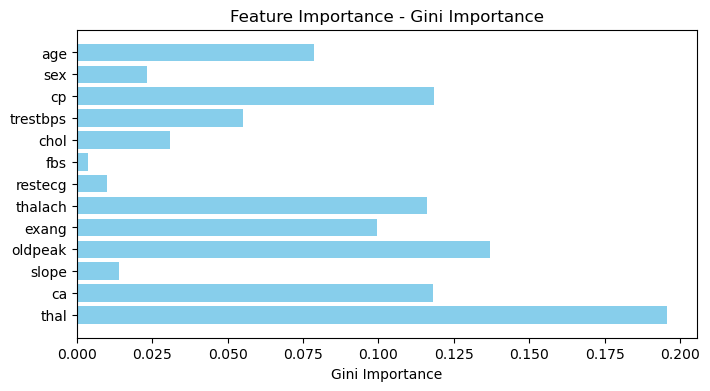

In [135]:
plt.figure(figsize=(8, 4))
plt.barh(Features, importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()